#Load and Explore

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the waiting time estimation data
df = pd.read_csv('/content/waiting_time_estimation_data.csv')

# Display the first few rows of the dataset
df.head()

,arrival_time,start_time,finish_time,wait_time,queue_length
0,30-03-2023 0.10,30-03-2023 0.10,2023-03-30 00:22:44.800000000,12.68,28
1,30-03-2023 0.10,30-03-2023 0.16,2023-03-30 00:25:53.200000000,9.82,28
2,30-03-2023 0.10,30-03-2023 0.16,2023-03-30 00:25:48.400000000,9.74,28
3,30-03-2023 0.10,30-03-2023 0.14,2023-03-30 00:27:23.200000000,13.32,28
4,30-03-2023 0.10,30-03-2023 0.15,2023-03-30 00:31:21.400000000,16.29,28


In [ ]:
df.describe()

,wait_time,queue_length
count,560.000000,560.000000
mean,10.107911,32.132143
std,5.032406,12.418048
min,-2.930000,2.000000
25%,6.527500,24.750000
50%,10.120000,30.000000
75%,13.322500,45.000000
max,26.980000,50.000000


# Data Preprocessing

In [31]:
# Convert date-time strings into datetime objects
df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%d-%m-%Y %H.%M')
df['start_time'] = pd.to_datetime(df['start_time'], format='%d-%m-%Y %H.%M')
df['finish_time'] = pd.to_datetime(df['finish_time'])

new

In [32]:
# Feature Engineering
df['arrival_hour'] = df['arrival_time'].dt.hour
df['arrival_minute'] = df['arrival_time'].dt.minute

In [27]:
# Sort the data by arrival_time
df.sort_values(by='arrival_time', inplace=True)

# Add a ticket_number column
df['ticket_number'] = range(1, len(df) + 1)

end

In [34]:
# Calculate the waiting time in minutes
df['hour_of_day'] = df['arrival_time'].dt.hour
# Calculate the service_time
df['service_time'] = (df['finish_time'] - df['start_time']).dt.total_seconds() / 60  # Convert to minutes
#calculate wait time
df['wait_time'] = (df['start_time'] - df['arrival_time']).dt.total_seconds() / 60

In [35]:
# Sort the DataFrame by arrival_time and wait_time
df = df.sort_values(by=['arrival_time', 'wait_time'])

# Assign sequence number
df['ticket_number'] = range(1, len(df) + 1)

# Define the column to move to the end
#target_column = 'wait_time'

# Reorder the columns to place wait_time at the very right
#columns = [col for col in df.columns if col != target_column] + [target_column]
#df = df[columns]

In [ ]:
df.head(50)

,arrival_time,start_time,finish_time,wait_time,queue_length,hour_of_day,service_time,ticket_number
12,2023-03-30 00:10:00,2023-03-30 00:20:00,2023-03-30 00:20:24.400000000,0.34,28,0,0.406667,1
9,2023-03-30 00:10:00,2023-03-30 00:18:00,2023-03-30 00:22:31.000000000,4.45,28,0,4.516667,2
26,2023-03-30 00:10:00,2023-03-30 00:18:00,2023-03-30 00:22:35.800000000,4.53,28,0,4.596667,3
11,2023-03-30 00:10:00,2023-03-30 00:19:00,2023-03-30 00:25:33.400000000,6.49,28,0,6.556667,4
10,2023-03-30 00:10:00,2023-03-30 00:14:00,2023-03-30 00:21:20.800000000,7.28,28,0,7.346667,5
25,2023-03-30 00:10:00,2023-03-30 00:17:00,2023-03-30 00:24:37.599999999,7.56,28,0,7.626667,6
24,2023-03-30 00:10:00,2023-03-30 00:11:00,2023-03-30 00:19:27.400000000,8.39,28,0,8.456667,7
14,2023-03-30 00:10:00,2023-03-30 00:14:00,2023-03-30 00:22:28.000000000,8.40,28,0,8.466667,8
27,2023-03-30 00:10:00,2023-03-30 00:11:00,2023-03-30 00:20:01.000000000,8.95,28,0,9.016667,9
2,2023-03-30 00:10:00,2023-03-30 00:16:00,2023-03-30 00:25:48.400000000,9.74,28,0,9.806667,10


#EDA

<ipython-input-11-fa5284d7d387>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df['hour_of_day'], y=df['wait_time'], ci=None)


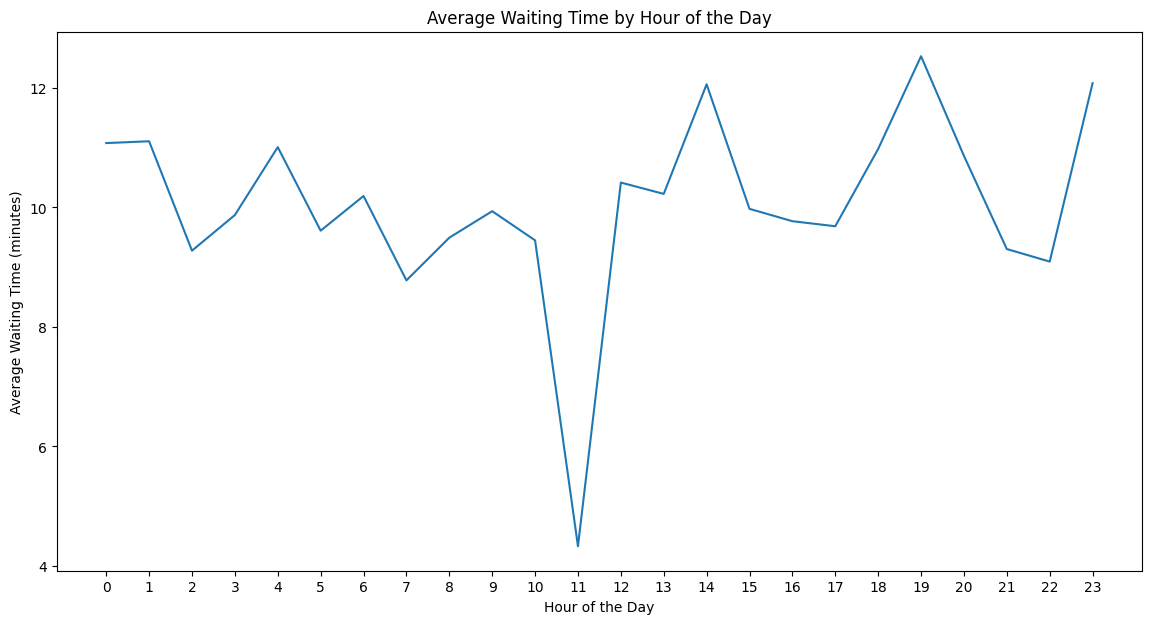

In [ ]:
# Line Plot: Average Waiting Time by Hour of the Day
plt.figure(figsize=(14, 7))
sns.lineplot(x=df['hour_of_day'], y=df['wait_time'], ci=None)
plt.title('Average Waiting Time by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Waiting Time (minutes)')
plt.xticks(ticks=range(0, 24))
plt.show()

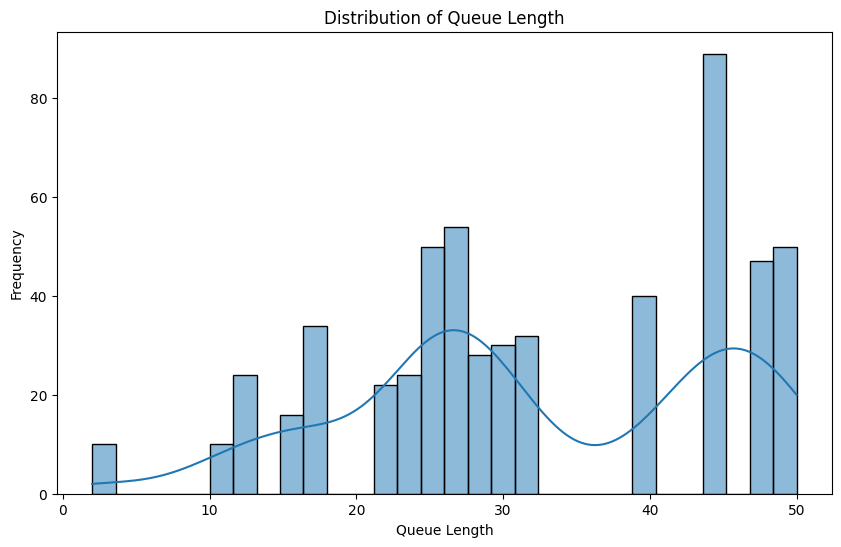

In [ ]:
# Distribution Plot: Queue Length
plt.figure(figsize=(10, 6))
sns.histplot(df['queue_length'], kde=True, bins=30)
plt.title('Distribution of Queue Length')
plt.xlabel('Queue Length')
plt.ylabel('Frequency')
plt.show()

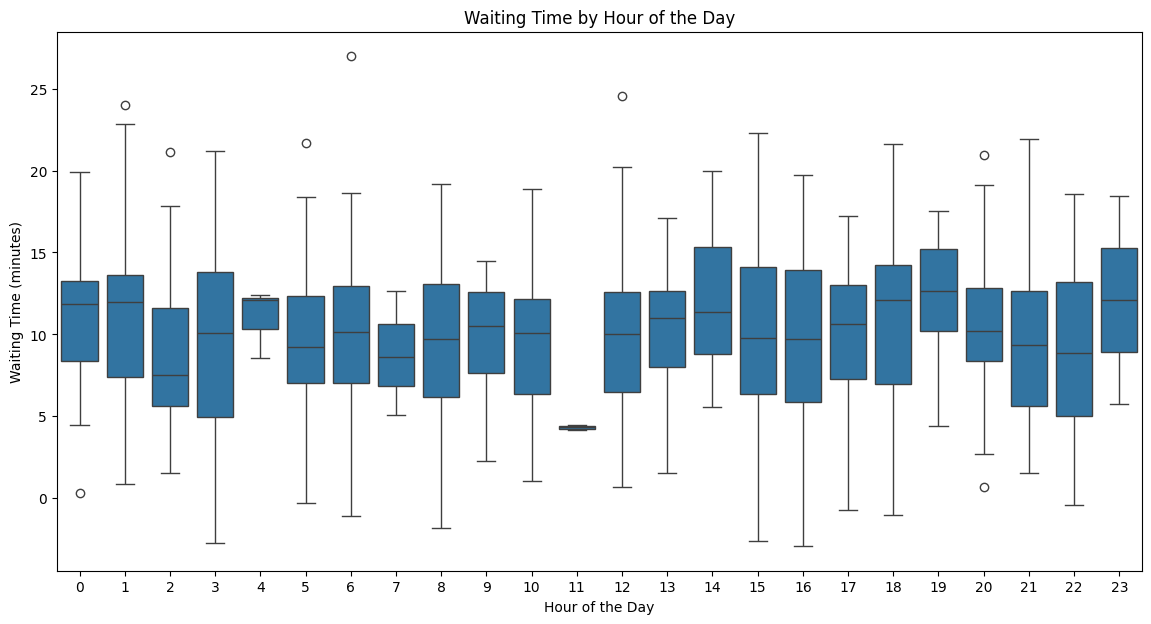

In [ ]:
# Visualization: Waiting Time by Hour of the Day
plt.figure(figsize=(14, 7))
sns.boxplot(x='hour_of_day', y='wait_time', data=df)
plt.title('Waiting Time by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Waiting Time (minutes)')
plt.xticks(ticks=range(0, 24))
plt.show()

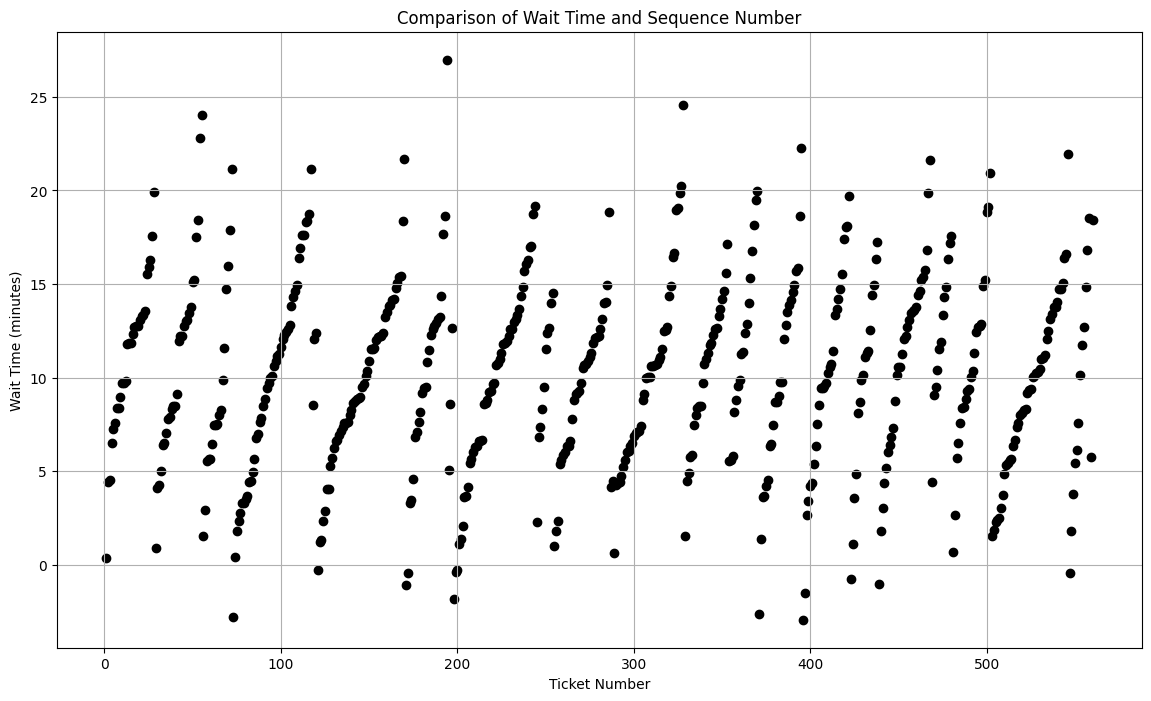

In [ ]:
# Create a scatter plot to compare wait time and sequence number
plt.figure(figsize=(14, 8))
plt.scatter(df['ticket_number'], df['wait_time'],  color='black' )
plt.title('Comparison of Wait Time and Sequence Number')
plt.xlabel('Ticket Number')
plt.ylabel('Wait Time (minutes)')
plt.grid(True)
plt.show()

#Modelling

                                     MAE      RMSE  R-squared
XGBoost Regression              0.516311  0.854992   0.933742
Random Forest Regression        0.561964  0.913888   0.924300
K-Nearest Neighbors Regression  0.583929  0.934841   0.920788
Gradient Boosting Regression    1.570157  2.074292   0.610011
Linear Regression               1.625964  2.180870   0.568906
Ridge Regression                2.087485  2.528406   0.420563
Lasso Regression                2.975020  3.404079  -0.050296
Support Vector Regression       2.939034  3.460841  -0.085615


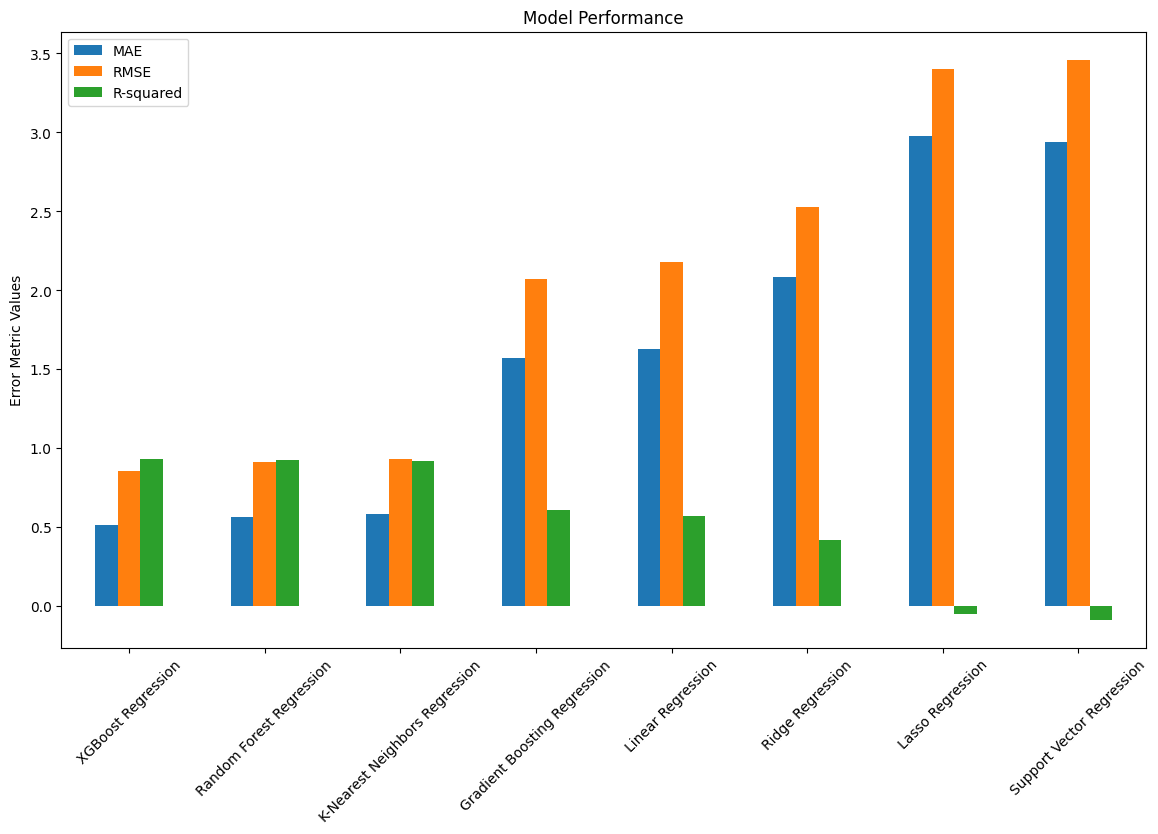

Best Model Performance: MAE=0.5288777610154024, RMSE=0.8583899737636037, R-squared=0.9332145617973493


In [36]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import joblib

# Prepare the feature matrix X and target vector y
X = df[['queue_length', 'arrival_hour','arrival_minute', 'ticket_number']]
y = df['wait_time']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf', C=1.0, epsilon=0.2),
    'XGBoost Regression': XGBRegressor(n_estimators=100, random_state=42),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(n_neighbors=5)
}

# Dictionary to store evaluation results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Ensure non-negative predictions
    y_pred = [max(0, pred) for pred in y_pred]

    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'MAE': mae,
        'RMSE': rmse,
        'R-squared': r2
    }

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results).T

# Sort the DataFrame by RMSE in ascending order (best model at the top)
sorted_results_df = results_df.sort_values(by='RMSE')

print(sorted_results_df)

# Plot the results
sorted_results_df.plot(kind='bar', figsize=(14, 8))
plt.title('Model Performance')
plt.ylabel('Error Metric Values')
plt.xticks(rotation=45)
plt.show()

# Hyperparameter tuning for the best model (example for XGBoost)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
y_pred_best = [max(0, pred) for pred in y_pred_best]

# Evaluate the best model
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Model Performance: MAE={mae_best}, RMSE={rmse_best}, R-squared={r2_best}")

In [37]:
#training data performance
y_pred = best_model.predict(X_train_scaled)

# Evaluasi model
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.19890963999707273
R^2 Score: 0.9815651915145065


In [38]:
# choose the best model to use
best_model_name = sorted_results_df.index[0]
best_model = models[best_model_name]

# Save the best model and scaler
joblib.dump(best_model, '/content/best_model.pkl')
joblib.dump(scaler, '/content/scaler.pkl')

['/content/scaler.pkl']